In [1]:
import cv2
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:

def add_random_effect(image,effect=None):
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Randomly select an effect
    if effect == None:
        effect = random.choice(['shape', 'text', 'rotation', 'border'])
        
    print("Applying effect ",effect)
    if effect == 'shape':
        # Randomly choose a shape: rectangle, circle, or line
        shape = random.choice(['rectangle', 'circle', 'line'])
        
        # Random color
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        
        if shape == 'rectangle':
            # Random coordinates for rectangle
            pt1 = (random.randint(0, width), random.randint(0, height))
            pt2 = (random.randint(0, width), random.randint(0, height))
            thickness = random.randint(1, 5)
            cv2.rectangle(image, pt1, pt2, color, thickness)
        
        elif shape == 'circle':
            # Random center and radius for circle
            center = (random.randint(0, width), random.randint(0, height))
            radius = random.randint(10, min(width, height) // 4)
            thickness = random.randint(1, 5)
            cv2.circle(image, center, radius, color, thickness)
        
        elif shape == 'line':
            # Random coordinates for line
            pt1 = (random.randint(0, width), random.randint(0, height))
            pt2 = (random.randint(0, width), random.randint(0, height))
            thickness = random.randint(1, 5)
            cv2.line(image, pt1, pt2, color, thickness)
    
    elif effect == 'text':
        # Random text
        text = "Random Text"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = random.uniform(0.5, 2.0)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        thickness = random.randint(1, 3)
        position = (random.randint(0, width - 100), random.randint(50, height))
        cv2.putText(image, text, position, font, font_scale, color, thickness)
    
    elif effect == 'rotation':
        # Random rotation angle
        angle = random.uniform(-45, 45)
        center = (width // 2, height // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    elif effect == 'border':
        # Random border color and thickness
        border_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        border_thickness = random.randint(10, 50)
        image = cv2.copyMakeBorder(image, border_thickness, border_thickness, border_thickness, border_thickness, cv2.BORDER_CONSTANT, value=border_color)
    
    return image


In [3]:
# Load an image
image_path = 'images.jpg'  # Replace with your image path
img = cv2.imread(image_path)


In [4]:
def getimg():
    image_path = 'images.jpg'  # Replace with your image path
    img = cv2.imread(image_path)
    return img


Applying effect  rotation
Applying effect  rotation


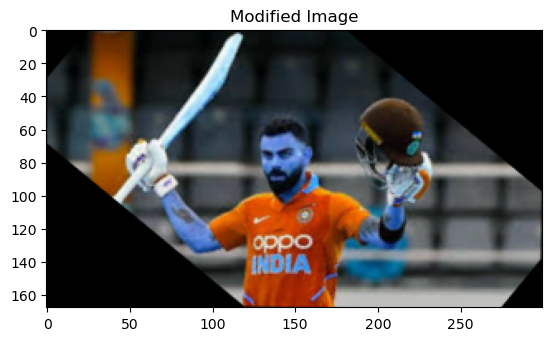

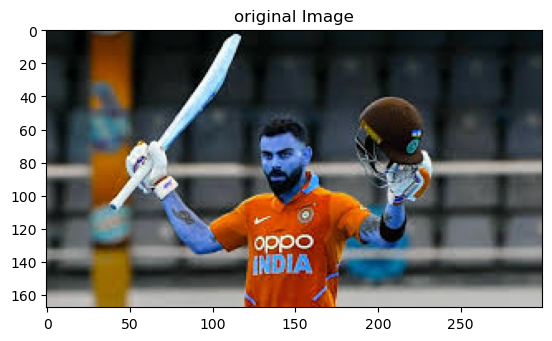

In [5]:

# Load an image
image_path = 'images.jpg'  # Replace with your image path
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not load image.")
else:
    # Add a random effect to the image
    modified_image = add_random_effect(img)
    modified_image = add_random_effect(modified_image,'rotation')    
    # Display the original and modified images
    
    # cv2.imshow('Original Image', image)
    # cv2.imshow('Modified Image', modified_image)
    plt.imshow(modified_image)
    plt.title("Modified Image")
    plt.show()
 
    plt.imshow(img)
    plt.title("original Image")
    plt.show()
   
    
    # Save the modified image
    cv2.imwrite('modified_image.jpg', modified_image)
    # Wait for a key press and close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:

def add_random_effect1(image,effect=None):
    # Get image dimensions
    height, width = image.shape[:2]
    total_pixels = height * width
    
    # Randomly select an effect
    if effect == None:
        effect = random.choice(['shape', 'text', 'rotation', 'border','color'])
        
    print("Applying effect ",effect)

    if effect == 'shape':
        # Randomly choose a shape: rectangle, circle, or line
        shape = random.choice(['rectangle', 'circle', 'line'])
        
        # Random color
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        
        if shape == 'rectangle':
            # Ensure the rectangle covers at least half of the image
            rect_width = random.randint(width // 2, width)
            rect_height = random.randint(height // 2, height)
            x1 = random.randint(0, width - rect_width)
            y1 = random.randint(0, height - rect_height)
            x2 = x1 + rect_width
            y2 = y1 + rect_height
            thickness = random.choice([-1, random.randint(1, 5)])  # -1 for filled rectangle
            cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)
        
        elif shape == 'circle':
            # Ensure the circle covers at least half of the image
            radius = random.randint(min(width, height) // 4, min(width, height) // 2)
            center_x = random.randint(radius, width - radius)
            center_y = random.randint(radius, height - radius)
            thickness = random.choice([-1, random.randint(1, 5)])  # -1 for filled circle
            cv2.circle(image, (center_x, center_y), radius, color, thickness)
        
        elif shape == 'line':
            # Ensure the line covers at least half of the image diagonally
            pt1 = (random.randint(0, width // 2), random.randint(0, height // 2))
            pt2 = (random.randint(width // 2, width), random.randint(height // 2, height))
            thickness = random.randint(1, 5)
            cv2.line(image, pt1, pt2, color, thickness)
    
    elif effect == 'text':
        # Ensure the text covers at least half of the image
        text = "Random Text"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = random.uniform(2.0, 5.0)  # Larger font scale to cover more area
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        thickness = random.randint(6, 10)
        
        # Calculate text size to ensure it covers enough area
        (text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, thickness)
        position = (random.randint(0, width - text_width%width), random.randint((text_height+1)%height, height))
        cv2.putText(image, text, position, font, font_scale, color, thickness)
    
    elif effect == 'rotation':
        # Rotate the image by a random angle
        angle = random.uniform(-180, 180)
        center = (width // 2, height // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        image = cv2.warpAffine(image, rotation_matrix, (width, height))

    elif effect == 'color':
          # w = width + 20
          # h = height + 20
          cv2.rectangle(image, (20, 20), (width-20, height-20), (0, 255, 0), -1)
          cv2.circle(image,(width // 2, height // 2), 50, (255, 0, 0), -1)
        
    elif effect == 'border':
        # Ensure the border covers at least half of the image
        border_thickness = random.randint(min(width, height) // 4, min(width, height) // 2)
        border_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        image = cv2.copyMakeBorder(image, border_thickness, border_thickness, border_thickness, border_thickness, cv2.BORDER_CONSTANT, value=border_color)
    
    return image


Applying effect  border
Applying effect  circle


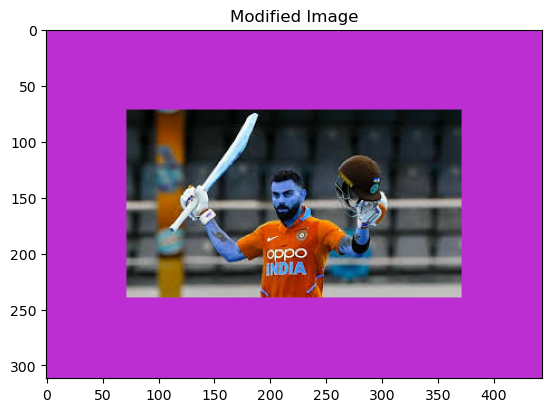

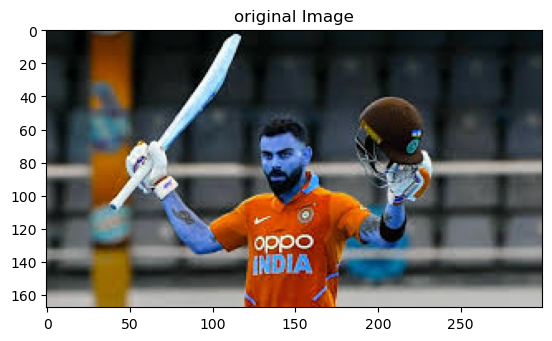

In [7]:


if img is None:
    print("Error: Could not load image.")
else:
    # Add a random effect to the image
    modified_image = add_random_effect1(img)
    # modified_image = add_random_effect1(modified_image,'rotation')
    modified_image = add_random_effect1(modified_image,'circle')
    
    # Display the original and modified images
    cv2.imshow('Original Image', img)
    cv2.imshow('Modified Image', modified_image)
    plt.imshow(modified_image)
    plt.title("Modified Image")
    plt.show()
 
    plt.imshow(img)
    plt.title("original Image")
    plt.show()
   
    
    
    # Save the modified image
    cv2.imwrite('modified_image.jpg', modified_image)
    
    # Wait for a key press and close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

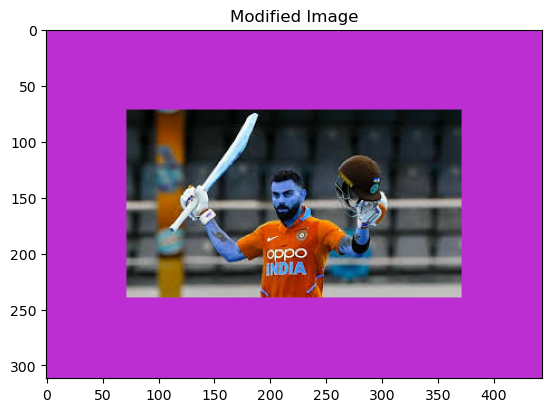

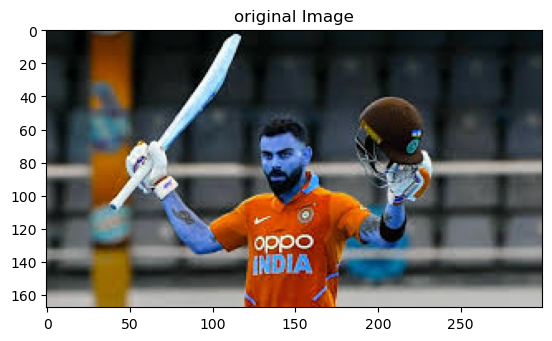

In [8]:
import cv2
import numpy as np

def cartoonify_image(image):
    # Step 1: Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Apply edge detection (Canny edge detector)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    
    # Step 3: Smooth the image using bilateral filtering
    smoothed = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Step 4: Apply color quantization
    # Reduce the number of colors in the image
    data = np.float32(smoothed).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    _, labels, centers = cv2.kmeans(data, 8, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    quantized = centers[labels.flatten()]
    quantized = quantized.reshape(smoothed.shape)
    
    # Step 5: Combine the edges and quantized image
    cartoon = cv2.bitwise_and(quantized, quantized, mask=edges)
    
    return cartoon

# # Load an image
# image_path = 'your_image.jpg'  # Replace with your image path
# image = cv2.imread(image_path)

if img is None:
    print("Error: Could not load image.")
else:
    # Apply the cartoonify effect
    cartoon_image = cartoonify_image(img)
    
    # Display the original and cartoonified images
    # cv2.imshow('Original Image', image)
    # cv2.imshow('Cartoonified Image', cartoon_image)
    plt.imshow(modified_image)
    plt.title("Modified Image")
    plt.show()
 
    plt.imshow(img)
    plt.title("original Image")
    plt.show()
   
    
    # Save the cartoonified image
    cv2.imwrite('cartoonified_image.jpg', cartoon_image)
    
    # Wait for a key press and close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
def classic_cartoon(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply edge detection
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    
    # Smooth the image
    smoothed = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Combine edges and smoothed image
    cartoon = cv2.bitwise_and(smoothed, smoothed, mask=edges)
    
    return cartoon

In [10]:
def pencil_sketch(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Invert the grayscale image
    inverted = cv2.bitwise_not(gray)
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(inverted, (21, 21), 0)
    
    # Blend the grayscale image with the blurred inverted image
    sketch = cv2.divide(gray, 255 - blurred, scale=256)
    
    return cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)

In [11]:
def watercolor_effect(image):
    # Apply median blur to smooth the image
    smoothed = cv2.medianBlur(image, 7)
    
    # Apply edge-preserving smoothing
    watercolor = cv2.stylization(smoothed, sigma_s=60, sigma_r=0.6)
    
    return watercolor

In [12]:
def comic_book(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply edge detection
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    
    # Posterize the image
    posterized = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    posterized[:, :, 2] = cv2.equalizeHist(posterized[:, :, 2])
    posterized = cv2.cvtColor(posterized, cv2.COLOR_HSV2BGR)
    
    # Combine edges and posterized image
    comic = cv2.bitwise_and(posterized, posterized, mask=edges)
    
    return comic

In [13]:
def oil_painting(image):
    # Apply oil painting effect
    oil_paint = cv2.xphoto.oilPainting(image, size=7, dynRatio=1)
    
    return oil_paint

In [14]:
def pop_art(image):
    # Reduce the number of colors using quantization
    data = np.float32(image).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    _, labels, centers = cv2.kmeans(data, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    quantized = centers[labels.flatten()]
    quantized = quantized.reshape(image.shape)
    
    # Enhance edges (single-channel mask)
    edges = cv2.Canny(image, 100, 200)
    
    # Combine quantized image and edges
    pop_art = cv2.bitwise_and(quantized, quantized, mask=edges)
    
    return pop_art

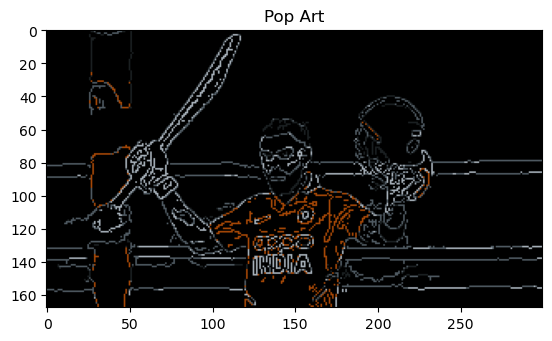

In [15]:
plt.imshow(pop_art(img))
plt.title("Pop Art")
plt.show()


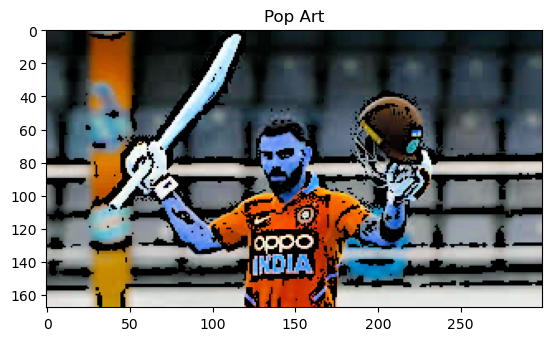

In [16]:
plt.imshow( comic_book(img))
plt.title("Pop Art")
plt.show()


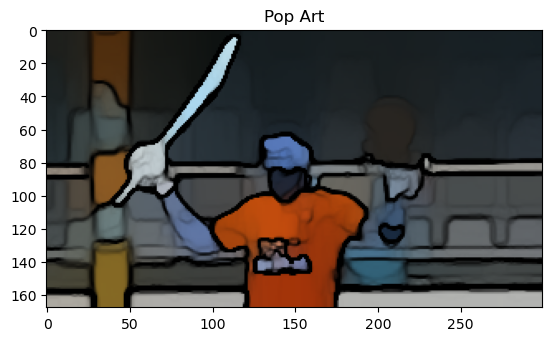

In [17]:

plt.imshow( watercolor_effect(img))
plt.title("Pop Art")
plt.show()

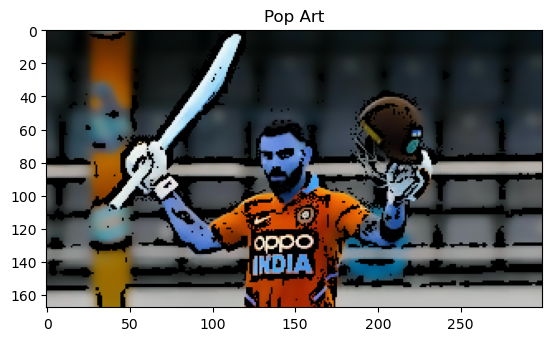

In [18]:


plt.imshow( classic_cartoon(img))
plt.title("Pop Art")
plt.show()

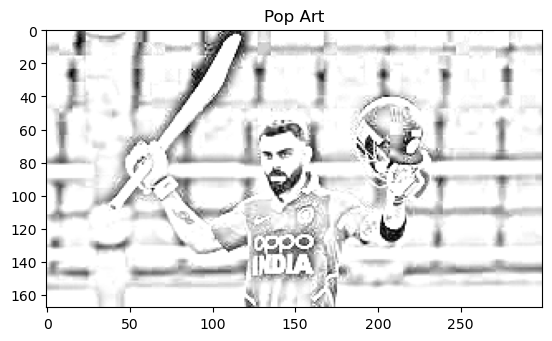

In [19]:

plt.imshow( pencil_sketch(img))
plt.title("Pop Art")
plt.show()

In [20]:
# Define the first color range (e.g., green)
img1 = getimg()
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])
mask_green = cv2.inRange(img1, lower_green, upper_green)

# Define the second color range (e.g., blue)
# lower_blue = np.array([100, 50, 50])
# upper_blue = np.array([130, 255, 255])
# mask_blue = cv2.inRange(img1, lower_blue, upper_blue)

# Replace green with red
img1[mask_green > 0] = (250, 0, 0)  # Red in BGR

# Replace blue with yellow
# image[mask_blue > 0] = (0, 255, 255)  # Yellow in BGR

# Display or save the result
cv2.imshow("Image with Multiple Replaced Colors", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# pip uninstall opencv-python opencv-contrib-python

In [ ]:
# pip install opencv-contrib-python